# Clustering temporal factors across days

In [4]:
import numpy as np
import flow
import os
import matplotlib.pyplot as plt
from munkres import Munkres
from scipy.cluster import hierarchy

### load tensors

In [13]:
method = 'ncp_bcd'
trace_type = 'zscore'
mouse = 'OA27'
days = flow.metadata.DateSorter.frommeta(mice=[mouse], tags=None)

temp_factors = []
day_num = []
for c, day1 in enumerate(days, 0):
    try:
        day2 = days[c+1]
    except IndexError:
        print('done.')
        break

    # create folder structure if needed
    # load
    out_dir = os.path.join(flow.paths.outd, str(day1.mouse))
    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)
    load_dir = os.path.join(out_dir, 'tensors paired ' + str(trace_type))
    if not os.path.isdir(load_dir):
        os.mkdir(load_dir)
    tensor_path = os.path.join(load_dir, str(day1.mouse) + '_' + str(day1.date)
                     + '_' + str(day2.date) + '_pair_decomp_' + str(trace_type) + '.npy')
    # save
    ana_dir = os.path.join(flow.paths.graphd, str(day1.mouse))
    if not os.path.isdir(ana_dir):
        os.mkdir(ana_dir)
    save_dir = os.path.join(ana_dir, 'tensors paired ' + str(trace_type))
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
#     save_dir = os.path.join(save_dir, 'qc')
#     if not os.path.isdir(save_dir):
#         os.mkdir(save_dir)
#     error_path = os.path.join(save_dir, str(day1.mouse) + '_' + str(day1.date)
#                      + '_' + str(day2.date) + '_error.png')
#     sim_path = os.path.join(save_dir, str(day1.mouse) + '_' + str(day1.date)
#                      + '_' + str(day2.date) + '_similarity.png')

    # load your data
    ensemble = np.load(tensor_path)
    ensemble = ensemble.item()
    V = ensemble[method]
    temp = V.results[8][0].factors[1]
    
    for f in range(np.shape(temp)[1]):
        temp_factors.append(temp[:,f])
        day_num.append(c+1)
    

done.


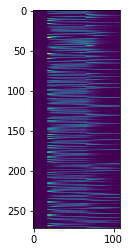

In [19]:
fac_array = np.array(temp_factors)
plt.imshow(fac_array)

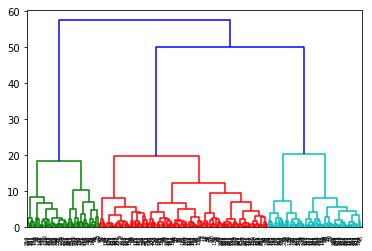

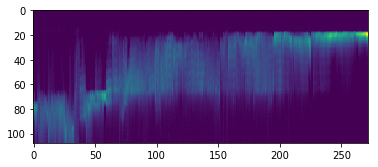

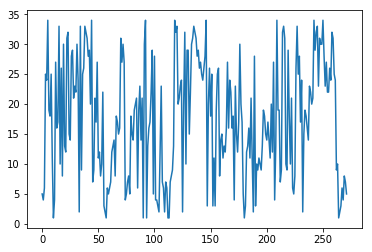

In [55]:
Z = hierarchy.ward(fac_array)
order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, fac_array))
order = np.array([int(o) for o in order]).flatten()
day_array = np.array(day_num)
# new_facs = np.zeros(np.shape(fac))
plt.figure()
hierarchy.dendrogram(Z)
plt.figure()
plt.imshow(fac_array[order, :].T)
plt.figure()
plt.plot(day_array[order])
# plt.figure()
# for i in range(272):
#     plt.plot()

1